In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
import numpy as np
import numpy as np
import os
import PIL
from PIL import Image

from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import call

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
os.walk('/gdrive/My Drive/Faces/Train')

<generator object walk at 0x7f5c8dc9bba0>

In [0]:
[x[0] for x in os.walk('/gdrive/My Drive/Faces/Train/')]

In [0]:
import os

#root, dirs, files = os.walk('/gdrive/My Drive/Faces/Train').next()
#print(dirs)

In [30]:
root='/gdrive/My Drive/Faces/Train'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]
print(dirlist)

['vstros', 'swsmit', 'yfhsie', 'tom', 'stu', 'vpsavo', 'whussa', 'will', 'svkriz', 'swewin', 'sandm', 'sbains', 'ste', 'robin', 'slbirc', 'sar', 'obeidn', 'spacl', 'pat', 'phughe', 'mike', 'ksunth', 'john', 'kaknig', 'lib', 'jer', 'lfso', 'mbutle', 'ian', 'klclar', 'gstamo', 'F8', 'F3', 'gsmall', 'F6', 'F7', 'F5', 'F4', 'glen', 'F2', 'darda', 'dav', 'elduns', 'ekavaz', 'dfhodd', 'drbost', 'den', 'dgemen', 'F1', 'cywan', 'cjbowe', 'chr', 'dakram', 'cgboyc', 'cladam', 'cfloro', 'cferdo', 'damvo', 'dah', 'bcbesta', 'ccjame', 'cadugd', 'carund', 'cchris', 'bschap', 'cdlarg', 'bplyce', 'bmphil', 'boylee', 'atfpou', 'azavro', 'awjsud', 'and', 'arwebb', 'asheal', 'ant', 'amtalb', 'aolcer', 'anonym1', 'akatsi', 'ajsega', 'ambarw', 'alebes', 'ahodki', 'agaffa', 'akopci', 'ajones', 'amflem', 'ajflem', 'admars', '9540784', '9540822', 'adpoun', '9540814', 'acatsa', '9540741', '9540792', '9540733', '9540768']


In [0]:
dirlist = list(dirlist)

In [34]:
dirlist.dtype()

AttributeError: ignored

In [10]:
root2='/gdrive/My Drive/Faces/Test'
dirlist2 = [ item for item in os.listdir(root2) if os.path.isdir(os.path.join(root2, item)) ]
print(dirlist2)

['lfso', 'klclar', 'sar', 'jer', 'glen', 'F4', 'F8', 'obeidn', 'robin', 'ksunth', 'cadugd', 'drbost', 'dgemen', 'bcbesta', 'damvo', 'cfloro', 'boylee', 'alebes', 'cladam', 'cchris']


In [11]:
train = train_datagen.flow_from_directory(
    '/gdrive/My Drive/Faces/Train',
        classes = dirlist,
        batch_size=64,
        target_size=(224, 224),
        class_mode='categorical',
        subset='training')

Found 1563 images belonging to 99 classes.


In [0]:
train.filenames[30]

'swsmit/swsmit.8.jpg'

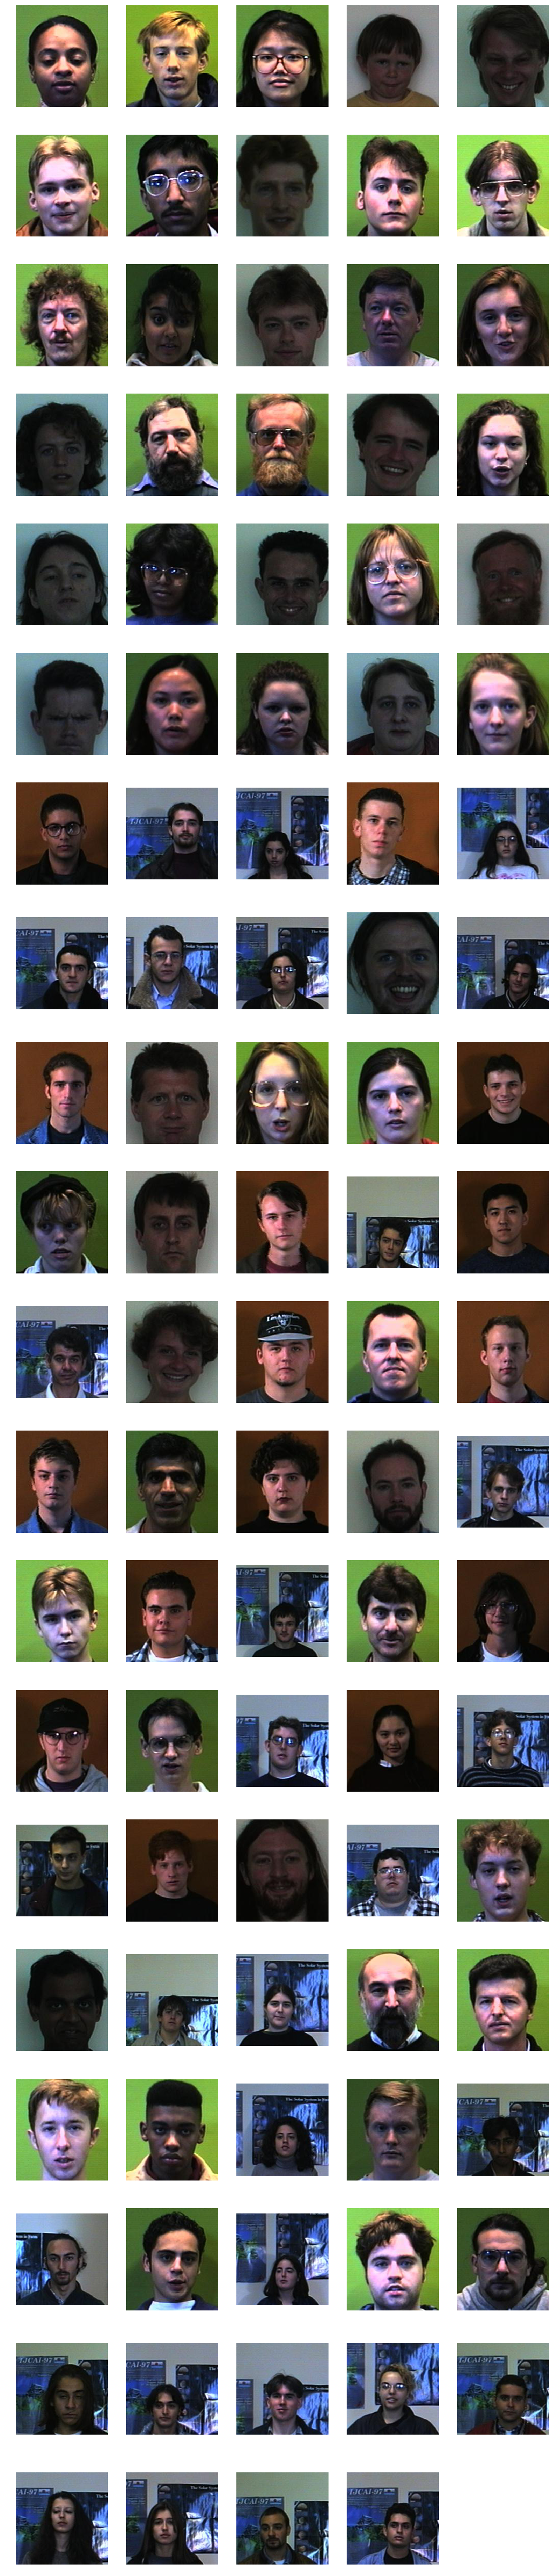

In [40]:
plt.figure(figsize=(20,99))
for ix,i in enumerate(dirlist):
    f = os.listdir(os.path.join(root,i))[0]
    img = mpimg.imread(os.path.join(root,i,f))
    plt.subplot(20,5,ix+1)
    plt.imshow(img)
    plt.axis('off')

In [0]:
val=train_datagen.flow_from_directory(
        '/gdrive/My Drive/Faces/Train',
        classes = dirlist,
        batch_size=64,
        target_size=(224, 224),
        class_mode='categorical',
        subset='validation')

Found 369 images belonging to 99 classes.


In [0]:
test = train_datagen.flow_from_directory(
        '/gdrive/My Drive/Faces/Test',
        classes = dirlist2,
        batch_size=64,
        target_size=(224, 224),
        class_mode='categorical')

Found 20 images belonging to 20 classes.


In [0]:
test1 = train_datagen.flow_from_directory(
        '/gdrive/My Drive/Faces/Test1',
        batch_size=64,
        target_size=(224, 224),
        class_mode='categorical')

Found 2 images belonging to 2 classes.


In [0]:
test1.filenames

['F4/9540687.2.jpg', 'sar/sar_exp.19.jpg']

In [0]:
classes = os.listdir('/gdrive/My Drive/Faces/Test') 

In [0]:
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train.image_shape

(224, 224, 3)

In [0]:
from keras.applications.inception_v3 import InceptionV3,decode_predictions

In [0]:
trained_model = InceptionV3(include_top=False,weights='imagenet')
x = trained_model.output
x=GlobalAveragePooling2D()(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.6)(x)
x=Dense(256,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
pred_inception= Dense(99,activation='softmax')(x)
model = Model(inputs=trained_model.input,outputs=pred_inception)

W0704 12:02:38.287994 140579996088192 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [0]:
#Initializing optimizer with learning rate
for layer in trained_model.layers:
    layer.trainable=False
    
#compiling the model
adam = Adam(lr=0.011)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=adam)

In [0]:
model.fit_generator(
        train,
        steps_per_epoch=25, # '//' in python returns only the quotient
        epochs=50,
        validation_data=val,
        validation_steps=6)

Epoch 1/50
25/25 [==============================] - 19s 745ms/step - loss: 3.1855 - acc: 0.3075 - val_loss: 8.3412 - val_acc: 0.0407
Epoch 2/50
25/25 [==============================] - 5s 196ms/step - loss: 1.2767 - acc: 0.6448 - val_loss: 7.5353 - val_acc: 0.0786
Epoch 3/50
25/25 [==============================] - 5s 199ms/step - loss: 0.5962 - acc: 0.8233 - val_loss: 5.5866 - val_acc: 0.1572
Epoch 4/50
25/25 [==============================] - 5s 200ms/step - loss: 0.4419 - acc: 0.8688 - val_loss: 5.6863 - val_acc: 0.1816
Epoch 5/50
25/25 [==============================] - 5s 206ms/step - loss: 0.3104 - acc: 0.9076 - val_loss: 7.5269 - val_acc: 0.1355
Epoch 6/50
25/25 [==============================] - 5s 214ms/step - loss: 0.2617 - acc: 0.9137 - val_loss: 6.8291 - val_acc: 0.1382
Epoch 7/50
25/25 [==============================] - 5s 209ms/step - loss: 0.2198 - acc: 0.9288 - val_loss: 8.2896 - val_acc: 0.0976
Epoch 8/50
25/25 [==============================] - 5s 209ms/step - loss: 0

In [0]:
train_datagen2 = ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                    height_shift_range=0.2,
                                    zoom_range=0.2)
train_generator2 = train_datagen2.flow_from_directory(directory=train_path, 
                                                    batch_size=64, 
                                                    class_mode='categorical', 
                                                    shuffle=True, 
                                                    target_size=(224,224))

In [0]:
from keras.applications.vgg16 import VGG16,decode_predictions,preprocess_input
base_model= VGG16(include_top=False,weights='imagenet')

W0722 09:19:04.803737 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 09:19:04.857932 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 09:19:04.869698 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 09:19:04.916552 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 16s 0us/step


W0722 09:19:21.399614 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 09:19:21.400818 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [0]:
x= base_model.output
x=GlobalAveragePooling2D()(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.6)(x)
x=Dense(256,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.5)(x)
pred=Dense(99,activation='softmax')(x)
model3= Model(inputs=base_model.input,outputs=pred)
print(type(model3))

W0722 09:19:56.997444 140038205327232 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0722 09:19:56.999099 140038205327232 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


<class 'keras.engine.training.Model'>


In [0]:
for layer in base_model.layers:
    layer.trainable=False

In [0]:
model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

W0722 09:20:06.560993 140038205327232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model3.fit_generator(
        train,
        steps_per_epoch=25, # '//' in python returns only the quotient
        epochs=25,
        validation_data=val,
        validation_steps=6)

W0722 09:20:16.580136 140038205327232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/25
25/25 [==============================] - 681s 27s/step - loss: 4.4660 - acc: 0.1052 - val_loss: 2.2798 - val_acc: 0.4851
Epoch 2/25
25/25 [==============================] - 17s 672ms/step - loss: 2.4874 - acc: 0.3760 - val_loss: 1.1781 - val_acc: 0.8537
Epoch 3/25
25/25 [==============================] - 17s 668ms/step - loss: 1.4950 - acc: 0.6460 - val_loss: 0.6833 - val_acc: 0.9702
Epoch 4/25
25/25 [==============================] - 17s 670ms/step - loss: 1.0091 - acc: 0.7881 - val_loss: 0.5086 - val_acc: 0.9458
Epoch 5/25
25/25 [==============================] - 17s 669ms/step - loss: 0.6566 - acc: 0.8716 - val_loss: 0.4056 - val_acc: 0.9539
Epoch 6/25
25/25 [==============================] - 17s 670ms/step - loss: 0.4742 - acc: 0.9172 - val_loss: 0.2439 - val_acc: 0.9756
Epoch 7/25
25/25 [==============================] - 17s 669ms/step - loss: 0.3781 - acc: 0.9369 - val_loss: 0.2140 - val_acc: 0.9837
Epoch 8/25
25/25 [==============================] - 17s 672ms/step - l

In [0]:
test_prob = model3.predict_generator(test, steps=1)
test_pred_classes4 = np.argmax(test_prob,axis=1) 
print(test_pred_classes4)

[73 49 70 66 74 45 75 40 62 79 25 43 84 53 38 57 10 82 63 14]


In [0]:
dirlist[]

'klclar'

In [0]:
b = []
for i in test_pred_classes4:
  
 b.append(dirlist[i])

In [0]:
b

['klclar',
 'cfloro',
 'jer',
 'glen',
 'ksunth',
 'cchris',
 'lfso',
 'boylee',
 'dgemen',
 'obeidn',
 'alebes',
 'cadugd',
 'sar',
 'cladam',
 'bcbesta',
 'damvo',
 'F4',
 'robin',
 'drbost',
 'F8']

In [0]:
dirlist2

['lfso',
 'klclar',
 'sar',
 'jer',
 'glen',
 'F4',
 'F8',
 'obeidn',
 'robin',
 'ksunth',
 'cadugd',
 'drbost',
 'dgemen',
 'bcbesta',
 'damvo',
 'cfloro',
 'boylee',
 'alebes',
 'cladam',
 'cchris']

#### Test accuracy is 100 percent as it is predicting all 20 pics correctly.
